In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [38]:
mX = [
        [
            [10, 2, -6],
            [-1, 4, 2],
            [2, 3, 6]
        ],
        [
            [-5, 2, -8],
            [4, -3, -9],
            [-8, -10, 9]
        ],
        [
            [10, -5, 3, 0],
            [3, -9, 2, -2],
            [-8, 0, 17, -4],
            [3, -3, -8, -15]
        ],
]

mY = [
    [17, -4, -12],
    [13, -7, -2],
    [9, 10, -10, -18]
]

In [39]:
def dominant(x):
    x = np.array(x)
    diagonal = np.diag(np.abs(x))
    sumWithDiagonal = np.sum(np.abs(x), axis = 1)
    sumWithoutDiagonal = sumWithDiagonal - diagonal

    for i in range(len(x)):
        print(f"diagonal: {i + 1}")
        printed = 0
        print(f"total of not diagonal: ", end=" ")
        for j, row in enumerate(x[i]):
            if np.abs(row) != diagonal[i]:
                print(f"|{row}|", end=" ")
                printed = printed + 1
            if printed == 1:
                print(" + ", end=" ")
                printed = printed + 1
            print(f" = {sumWithoutDiagonal[i]}")

            if diagonal[i] > sumWithoutDiagonal[i]:
                print(f"{diagonal[i]} > {sumWithoutDiagonal[i]}")
            else:
                print(f"{diagonal[i]} < {sumWithoutDiagonal[i]}")

    if np.all(diagonal > sumWithoutDiagonal):
        return True
    else:
        return False


In [40]:
def seidel(x, y, tol, max):
    x = np.array(x)
    y = np.array(y)
    flag = 0

    diagonal = (np.diag(np.abs(x)))
    x = -x
    np.fill_diagonal(x, 0)
    xBef = np.zeros(x.shape[0])
    for i in range(1, max + 1):
        xNew = np.array(xBef)
        if flag == 0:
            for j, row in enumerate(x):
                print(f"X{j} = {y[j]}", end=" ")
                for k, ele in enumerate(row):
                    if j != k:
                        print(f" + ({ele} x {k})", end=" ")
                print(f" / {diagonal[j]}")
                flag = 1
        print(f"Iteration: {i}|")
        for j, row in enumerate(x):
            xNew[j] = (y[j] + np.dot(row, xNew)) / diagonal[j]
            print(f"X{j+1} = ", end=" ")
            print(format(xNew[j], ".9f"), end=" ")
        print("")
        distance = np.sqrt(np.dot(xNew -xBef, xNew -xBef))
        if distance < tol:
            return True
        xBef = xNew
    return False

In [41]:
for i, (x,y) in enumerate(zip(mX, mY)):
    if dominant(x):
        print(seidel(x,y,0.01456, 5))
    else:
        print("not diagonally dominant")

diagonal: 1
total of not diagonal:   = 8
10 > 8
|2|  +   = 8
10 > 8
|-6|  = 8
10 > 8
diagonal: 2
total of not diagonal:  |-1|  +   = 3
4 > 3
 = 3
4 > 3
|2|  = 3
4 > 3
diagonal: 3
total of not diagonal:  |2|  +   = 5
6 > 5
|3|  = 5
6 > 5
 = 5
6 > 5
X0 = 17  + (-2 x 1)  + (6 x 2)  / 10
X1 = -4  + (1 x 0)  + (-2 x 2)  / 4
X2 = -12  + (-2 x 0)  + (-3 x 1)  / 6
Iteration: 1|
X1 =  1.700000000 X2 =  -0.575000000 X3 =  -2.279166667 
Iteration: 2|
X1 =  0.447500000 X2 =  0.251458333 X3 =  -2.274895833 
Iteration: 3|
X1 =  0.284770833 X2 =  0.208640625 X3 =  -2.199243924 
Iteration: 4|
X1 =  0.338725521 X2 =  0.184303342 X3 =  -2.205060178 
Iteration: 5|
X1 =  0.340103225 X2 =  0.187555895 X3 =  -2.207145689 
True
diagonal: 1
total of not diagonal:   = 10
5 < 10
|2|  +   = 10
5 < 10
|-8|  = 10
5 < 10
diagonal: 2
total of not diagonal:  |4|  +   = 13
3 < 13
 = 13
3 < 13
|-9|  = 13
3 < 13
diagonal: 3
total of not diagonal:  |-8|  +   = 18
9 < 18
|-10|  = 18
9 < 18
 = 18
9 < 18
not diagonally domi

In [42]:
lx = [1, 5, 7, 2, 3, 9, 10, 4, 6, 8]
ly = [34, 51, 80, 25, 90, 76, 100, 11, 45, 62]

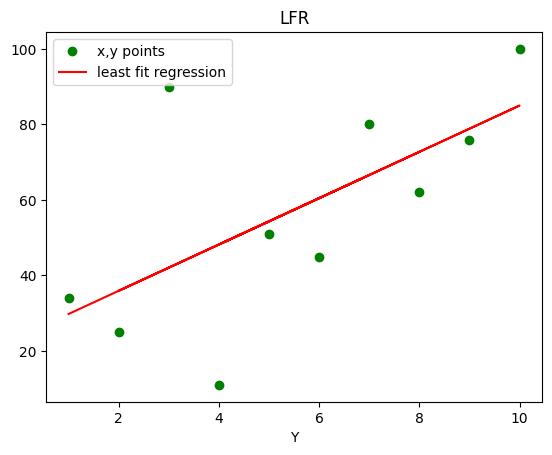

In [43]:
A = np.vstack([lx, np.ones(len(lx))]).T
Y = np.vstack(ly)

invers = np.linalg.inv(np.dot(A.T, A))
beta = np.dot(np.dot(invers, A.T), Y)

m = beta[0]
c = beta[1]

yb = m * lx + c

plt.plot(lx, ly, "go", label="x,y points")
plt.plot(lx, yb, "r-", label="least fit regression")
plt.legend(loc = "upper left")
plt.xlabel("X")
plt.xlabel("Y")
plt.title("LFR")
plt.show()


In [44]:
x = symbols('x')
f1 = lambda x: 8*x**4 + 4*x**4 - 4
df1 = diff(f1(x), x)
df1 = lambdify(x, df1, 'numpy')

f2 = lambda x: 4*x**7 + 9*x**2 - 6*x**2 - 7 + 1
df2 = diff(f2(x), x)
df2 = lambdify(x, df2, 'numpy')

def NR(f, df, x, tol, max):
    if max == 6:
        return False
    if max > 0:
        print(f"Iteration: {max}, root {x}")
    if np.abs(f(x) < tol):
        print(x)
        return True
    return NR(f, df, x - (f(x) / df(x)), tol, max + 1)
print(NR(f1, df1, 1,0.01456, 0))
print(NR(f2, df2, 1,0.01456, 0))

Iteration: 1, root 0.8333333333333334
Iteration: 2, root 0.769
Iteration: 3, root 0.7599982072477881
0.7599982072477881
True
Iteration: 1, root 0.9705882352941176
Iteration: 2, root 0.9681319847671869
0.9681319847671869
True


In [47]:
f = lambda x: 7*x**5 + 8*x**3 - 3*x**5 + 9 + 4*x**2
un = -6
up = 3
n = 30

x = np.linspace(un, up, n)
width = (up - un) / (n - 1)

xl = x[:-1]
xr = x[1:]
xm = (xr + xl) / 2

yl = f(xl)
yr = f(xr)
ym = f(xm)

left = width * np.sum(np.abs(yl))
right = width * np.sum(np.abs(yr))
mid = width * np.sum(np.abs(ym))
trap = width * np.sum(np.abs(yl) + (np.abs(yr))) / 2

print("left: ", left)
print("right: ", right)
print("mid: ", mid)
print("trapezoid: ", trap)

left:  39188.743630324134
right:  29429.640182048275
mid:  33966.03930787479
trapezoid:  34309.191906186206
